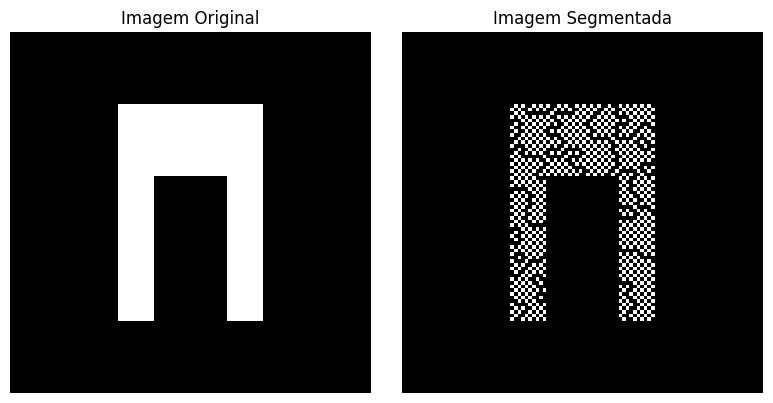

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Função para criar o grafo a partir da imagem
def create_graph(image, threshold):
    rows, cols = image.shape
    graph = {}
    
    for r in range(rows):
        for c in range(cols):
            if (r, c) not in graph:
                graph[(r, c)] = []
            # Adjacência 4: cima, baixo, esquerda, direita
            for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nr, nc = r + dr, c + dc
                if 0 <= nr < rows and 0 <= nc < cols:
                    if abs(int(image[r, c]) - int(image[nr, nc])) < threshold:
                        graph[(r, c)].append((nr, nc))
    
    return graph

# Algoritmo guloso para a Cobertura Mínima de Vértices
def greedy_vertex_cover(graph):
    vertex_cover = set()
    uncovered_vertices = set(graph.keys())
    
    while uncovered_vertices:
        # Encontre o vértice com o maior grau
        max_vertex = max(uncovered_vertices, key=lambda v: len(graph[v]))
        
        # Adicione à cobertura
        vertex_cover.add(max_vertex)
        
        # Remova o vértice e seus vizinhos da lista de não cobertos
        uncovered_vertices.remove(max_vertex)
        uncovered_vertices -= set(graph[max_vertex])

    return vertex_cover

# Função para segmentar a imagem
def segment_image(image, threshold):
    graph = create_graph(image, threshold)
    cover = greedy_vertex_cover(graph)
    
    segmented_image = np.zeros_like(image)
    for vertex in cover:
        segmented_image[vertex] = image[vertex]
    
    return segmented_image

# Exemplo de uso
if __name__ == "__main__":
    mario_matriz = np.zeros((100, 100), dtype=np.uint8)  # Matriz 100x100 com valores iniciais 0 (preto)

# Desenhando a cabeça
    mario_matriz[20:80, 30:70] = 255  # Círculo branco para a cabeça

# Desenhando o corpo
    mario_matriz[40:80, 40:60] = 0  # Retângulo preto para o corpo
    # Criar uma imagem de exemplo (grayscale)
    image = np.array([[100, 100, 200, 200],
                      [100, 100, 200, 200],
                      [50, 50, 150, 150],
                      [50, 50, 150, 150]], dtype=np.uint8)

    threshold = 50  # Limite de intensidade
    segmented = segment_image( mario_matriz, threshold)

    # Exibir a imagem original e a segmentada
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title('Imagem Original')
    plt.imshow( mario_matriz, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Imagem Segmentada')
    plt.imshow(segmented, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
